<a href="https://colab.research.google.com/github/prof-nuduls/EE628HW/blob/main/EE628_HW5_Miller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
from keras.layers import ZeroPadding2D,Flatten,BatchNormalization,Activation,MaxPooling2D,Conv2D,Dense,Add
from keras.initializers import glorot_uniform
from keras.models import Model
from keras.utils import to_categorical
from keras import Input
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, 'Class [6]')

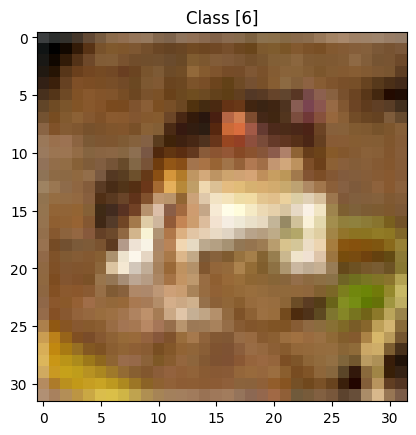

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32,32, 3)
x_test = x_test.reshape(x_test.shape[0],32,32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

In [ ]:
number_of_classes = 10

y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

y_train[0], y_train[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [ ]:
input_shape = x_train[0].shape
input_shape

(32, 32, 3)

In [ ]:
# Define the input as a tensor with shape input_shape
X_input = Input(shape=input_shape)


# Zero-Padding
X = ZeroPadding2D((3, 3))(X_input)
X.shape
# Stage 1
X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3,name = 'bn_conv1')(X)
X = Activation('relu')(X)
print(X.shape)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)
X.shape


(None, 16, 16, 64)


TensorShape([None, 7, 7, 64])

In [ ]:
X.shape

TensorShape([None, 7, 7, 64])

In [ ]:
X_shortcut = X

# Begin Stage 2
X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv2', padding = 'same',kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv2')(X)
X = Activation('relu')(X)
print(X.shape)

X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv3', padding = 'same',kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv3')(X)
print(X.shape)

X = Add()([X_shortcut, X])
X = Activation('relu')(X)

(None, 7, 7, 64)
(None, 7, 7, 64)


In [ ]:
# output layer
X = Flatten()(X)
X = Dense(number_of_classes, activation='softmax', name='fc' + str(number_of_classes), kernel_initializer = glorot_uniform(seed=0))(X)

In [ ]:
# Create model
model = Model(inputs = X_input, outputs = X, name='ResNet50')

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

#model.fit(x_train, x_train, batch_size=128, epochs=1, validation_data=(x_test, y_test))

model.fit(train_generator, steps_per_epoch=50000//64, epochs=5,
validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
781/781 [==============================] - 128s 161ms/step - loss: 1.5645 - accuracy: 0.4586 - val_loss: 1.9137 - val_accuracy: 0.4319
Epoch 2/5
781/781 [==============================] - 110s 141ms/step - loss: 1.1972 - accuracy: 0.5804 - val_loss: 1.3166 - val_accuracy: 0.5423
Epoch 3/5
781/781 [==============================] - 115s 147ms/step - loss: 1.0466 - accuracy: 0.6341 - val_loss: 1.4818 - val_accuracy: 0.5254
Epoch 4/5
781/781 [==============================] - 108s 138ms/step - loss: 0.9612 - accuracy: 0.6616 - val_loss: 1.1552 - val_accuracy: 0.6095
Epoch 5/5
781/781 [==============================] - 110s 140ms/step - loss: 0.8981 - accuracy: 0.6854 - val_loss: 1.3827 - val_accuracy: 0.5782


In [ ]:
score = model.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 5s 17ms/step - loss: 1.3821 - accuracy: 0.5783

Test accuracy:  0.5782999992370605
